<a href="https://colab.research.google.com/github/utsavsingh899/Product-Recommendation-System-for-E-commerce-website/blob/main/major_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Recommendation System for E-commerce Website**



---



***Importing libraries***

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib inline
plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD

***Loading the dataset***

*Source: https://www.kaggle.com/skillsmuggler/amazon-ratings*

In [13]:
amazon_ratings = pd.read_csv('/content/drive/Shareddrives/Shared Drive/Major Project/ratings_Beauty.csv')
amazon_ratings = amazon_ratings.dropna()
amazon_ratings.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [14]:
amazon_ratings.shape

(2023070, 4)



---



# **Recommendation System Part 1**

**Product popularity based recommendation system targeted at new customers**

***Viewing the top 10 most popular products***

In [15]:
popular_products = pd.DataFrame(amazon_ratings.groupby('ProductId')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(10)

,Rating
ProductId,
B001MA0QY2,7533
B0009V1YR8,2869
B0043OYFKU,2477
B0000YUXI0,2143
B003V265QW,2088
B000ZMBSPE,2041
B003BQ6QXK,1918
B004OHQR1Q,1885
B00121UVU0,1838


***Plotting the top 10 most popular products***

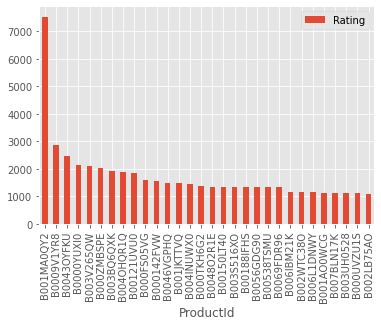

In [16]:
most_popular.head(30).plot(kind = "bar")

*The above graph gives us the most popular products (arranged in descending order) sold by the business.*



---



# **Recommendation System Part 2**

**Model-based collaborative filtering system**

***Making utility matrix***

In [17]:
# Subset of Amazon Ratings

amazon_ratings_subset = amazon_ratings.head(10000)

In [18]:
ratings_utility_matrix = amazon_ratings_subset.pivot_table(values='Rating', index='UserId', columns='ProductId', fill_value=0)
ratings_utility_matrix.head()

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,130414674X,1304168522,1304174778,1304174867,1304174905,1304196046,1304196062,1304196070,1304196135,1304351475,1304482596,1304482634,1304482685,1304488608,1304495396,1304511073,1304511081,1304511111,130451112X,1304511138,1304511146,1304511154,1304622193,1304622223,1304622428,1304622452,1304622460,1304622622,1304622657,1304622665,...,B000052YMU,B000052YMV,B000052YMX,B000052YN5,B000052YN6,B000052YN7,B000052YN9,B000052YNA,B000052YNB,B000052YNE,B000052YOC,B000052YOG,B000052YOL,B000052YOM,B000052YOQ,B000052YOR,B000052YOS,B000052YOT,B000052YOU,B000052YOV,B000052YOX,B000052YOY,B000052YOZ,B000052YP0,B000052YP1,B000052YP3,B000052YP4,B000052YP6,B000052YP9,B000052YPC,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A03056581JJIOL5FSKJY7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A03099101ZRK4K607JVHH,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A0505229A7NSH3FRXRR4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
ratings_utility_matrix.shape

(9697, 886)

***Transposing the utility matrix***

In [20]:
X = ratings_utility_matrix.T
X.head()

UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,A0870685EP51H0X8LFFU,A100AM334XZS3V,A100GYE1W4OXZ8,A100UD67AHFODS,A101GN97A47S1P,A10205RFE66H1R,A1029IITTU8289,A102LFZGD4MJXV,A1034GEUA8ZVFR,A103BJIOJSDJL1,A103FNP25GNMPH,A103PIRYKWQKR7,A103QH6R6A4FT1,A103QUZ016BQNJ,A103U3KR4L2ZXT,A1041053SID37WN8GTT8,A104CBA4A4HYOF,A104D62WJII6KP,A105C73RQ4YGCW,A1087Y8RJ4D422,A108HJD2ESJXUY,A108JE8E0CK1G3,A108LMMYNGL89M,A108V4O9Z78DB5,A10BXWWQPUDNCW,A10BZV61MNLBZD,A10C03UY4QEHJT,A10FEMX3ROQPTD,A10FXC2G4J7V6J,A10G0QS2B1S9J2,...,AZD8DMTDUVUDL,AZDHBUN122II4,AZDIZ674B4GVL,AZEIM64I6C7WW,AZG4Z8O02E9H4,AZG82XLVC98Y3,AZGGH4GS18RUN,AZGNXVV2ENZW8,AZHA72ZW5U8,AZJ8PVOKAJS5,AZJSE6RVOUU0E,AZKWPIG6RXKNG,AZLE2XFH3JUNG,AZLXFHIJ0J4VQ,AZLYAJ8XE443K,AZM0CLX6A5FFB,AZM3MWNYYPF0J,AZMS0XGWN43LW,AZMW54GPQ0WTQ,AZMWU0SO3H0DG,AZN3PS2PIZV06,AZNACMHVBRB5P,AZNOO10AO8G8V,AZP9CW7C6G8XO,AZPJ8ZDUN5HY8,AZSCK9QG6SMSB,AZSY5LHJ6LN7F,AZUFBU43ILNPC,AZUOLPXIGPG5O,AZW0RIARTTWWR,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
X.shape

(886, 9697)

In [22]:
X1 = X

***Decomposing the Matrix***

In [23]:
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(886, 10)

***Correlation Matrix***

In [24]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(886, 886)

***Isolating Product ID # 130414089X from the Correlation Matrix***

*Assuming the customer buys Product ID # 6117036094 (randomly chosen)*

In [25]:
X.index[7]

'130414089X'

*Index # of product ID purchased by customer*

In [26]:
i = "130414089X"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

7

*Correlation for all items with the item purchased by this customer based on items rated by other customers people who bought the same product*

In [27]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(886,)

***Recommending top 10 highly correlated products in sequence***

In [28]:
Recommend = list(X.index[correlation_product_ID > 0.90])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:9]

['1304196070',
 '1304351475',
 '5297000963',
 '535795531X',
 '5357955743',
 '5357955867',
 '6022600685',
 '6022600812',
 '6117043058']

*Here are the top 10 products to be displayed by the recommendation system to the above customer based on the purchase history of other customers in the website.*